In [9]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense,Conv2D,MaxPooling2D,Dropout,Flatten
from keras import models

In [10]:
model = models.Sequential()
model.add(Conv2D(16,(3,3),activation='relu',padding='same',input_shape=(128,128,1)))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(32,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(3,activation='softmax'))
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint


callback = [EarlyStopping(patience=2,monitor='val_loss'),ModelCheckpoint(filepath='./model.h5',monitor='val_loss',save_best_only=True)]

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 128, 128, 16)      160       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 64, 64, 16)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 64, 64, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 64)       

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
data_generator = ImageDataGenerator(
    rotation_range=20,
    horizontal_flip=True,
    vertical_flip=True,
    shear_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2
)

In [12]:
train_generator=data_generator.flow_from_directory(
    './data/train',
    target_size=(128,128),
    batch_size=32,
    color_mode = 'grayscale',
    shuffle=True,
    class_mode='categorical'
)
validation_generator=data_generator.flow_from_directory(
    './data/test',
    color_mode = 'grayscale',
    target_size=(128,128),
    batch_size=32,
    shuffle=True,
    class_mode='categorical'
)
test_generator=data_generator.flow_from_directory(
    './data/test',
    target_size=(128,128),
    batch_size=32,
    color_mode = 'grayscale',
    shuffle=True,
    class_mode='categorical'
)

model.fit(train_generator,epochs=20,steps_per_epoch=600,validation_data=validation_generator,validation_steps=40,callbacks=callback)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.
Found 372 images belonging to 3 classes.
Epoch 1/20
600/600 [==============================] - 150s 250ms/step - loss: 4.7568 - accuracy: 0.4369 - val_loss: 0.9589 - val_accuracy: 0.4823
Epoch 2/20
600/600 [==============================] - 151s 251ms/step - loss: 0.6231 - accuracy: 0.7272 - val_loss: 0.4159 - val_accuracy: 0.8658
Epoch 3/20
600/600 [==============================] - 151s 251ms/step - loss: 0.3093 - accuracy: 0.8839 - val_loss: 0.3888 - val_accuracy: 0.8596
Epoch 4/20
600/600 [==============================] - 151s 251ms/step - loss: 0.2017 - accuracy: 0.9282 - val_loss: 0.2287 - val_accuracy: 0.9100
Epoch 5/20
600/600 [==============================] - 152s 253ms/step - loss: 0.1573 - accuracy: 0.9454 - val_loss: 0.2207 - val_accuracy: 0.9518
Epoch 6/20
600/600 [==============================] - 165s 275ms/step - loss: 0.1336 - accuracy: 0.9532 - val_loss: 0.1162 - val_accuracy: 0.9594


In [32]:
model.predict('./data/validation/paper1.png')

AttributeError: 'str' object has no attribute 'ndim'

In [14]:
model_score= model.evaluate_generator(test_generator,steps=20)
print("Model loss",model_score[0])
print("model accuracy",model_score[1])

Model loss 0.12616798281669617
model accuracy 0.9235668778419495


In [6]:
import cv2
import numpy as np
img = cv2.imread('./data/validation/paper6.png')
img = cv2.resize(img,(128,128))
img  = np.reshape(img,[128,128,3])
img = np.expand_dims(img,0)
img.shape
classes = model.predict_classes(img)
print(classes)

[0]


In [13]:
model.save('best_model_grayscale.h5')

In [5]:
model = models.load_model('./best_model.h5')

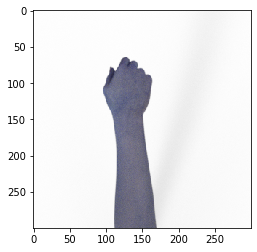

In [6]:
import cv2
from matplotlib import pyplot as plt
def read_image(path):
    img = cv2.imread(path)
    plt.imshow(img)
    plt.show()

read_image('./data/validation/rock5.png')

In [59]:
def live_image():
    hand_cascade = cv2.CascadeClassifier('hand.xml')
    cap = cv2.VideoCapture(0)
    while True:
        ret,img = cap.read()
        #img=cv2.imread('./data/validation/rock2.png')
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        hand = hand_cascade.detectMultiScale(gray,1.3,5)
        for (x,y,w,h) in hand:
            cv2.rectange(img,(x,y),(x+w,y+h),(255,0,0),2)
            roi_gray = gray[y:y+h,x:x+w]
            roi_color = img[y:y+h,x:x+w]
        
        cv2.imshow('img',img)
        k=cv2.waitKey(30) & 0xff
        if k == 27:
            break
    cap.release()
    cv2.destroyAllWindows()

live_image()

In [56]:
cap = cv2.VideoCapture(0)
if not (cap.isOpened()):
    print("Could not open video device")

Could not open video device


In [6]:
import cv2
import numpy as np

In [2]:
import cv2
from keras import models
model = models.load_model('./best_model_grayscale.h5')
import numpy as np
def live_image():
    hand_cascade = cv2.CascadeClassifier('hand.xml')
    cap = cv2.VideoCapture(0)
    fgbg = cv2.createBackgroundSubtractorMOG2()
    while True:
        ret,img = cap.read()
        fgmask = fgbg.apply(img)
        #img=cv2.imread('./data/validation/rock2.png')
        # gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        # hand = hand_cascade.detectMultiScale(gray,minSize=(10,10))
        # for (x,y,w,h) in hand:
        #     cv2.rectange(img,(x,y),(x+w,y+h),(255,0,0),2)
        cv2.imshow('img',fgmask)
        k=cv2.waitKey(30) & 0xff
        if k == 27:
            break
        elif k==32:

            fgmask = cv2.resize(fgmask,(128,128))
            fgmask = fgmask.reshape(1,128,128,1)
            prediction = model.predict_classes(fgmask)
            if prediction == 1:
                prediction='rock'
            elif prediction == 2:
                prediction='scissors'
            elif prediction == 0:
                prediction = 'paper'
            print(prediction)
    cap.release()
    cv2.destroyAllWindows()

live_image()

In [12]:
import cv2
from keras import models
model = models.load_model('./best_model.h5')
import numpy as np
def live_image():
    hand_cascade = cv2.CascadeClassifier('hand.xml')
    cap = cv2.VideoCapture(0)
    while True:
        ret,img = cap.read()
        #fgmask = fgbg.apply(img)
        #img=cv2.imread('./data/validation/rock2.png')
        #gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        # hand = hand_cascade.detectMultiScale(gray,minSize=(10,10))
        # for (x,y,w,h) in hand:
        #     cv2.rectange(img,(x,y),(x+w,y+h),(255,0,0),2)
        top, right, bottom, left = 10, 350, 400, 790
        #cv2.imshow('cam',img)
        img = cv2.flip(img, 1)
        img = img[top:bottom, right:left]
        cv2.imshow('img',img)
        k=cv2.waitKey(30) & 0xff
        if k == 27:
            break
        elif k==32:

            img = cv2.resize(img,(128,128))
            img = img.reshape(1,128,128,3)
            prediction = model.predict_classes(img)
            if prediction == 1:
                prediction='rock'
            elif prediction == 2:
                prediction='scissors'
            elif prediction == 0:
                prediction = 'paper'
            print(prediction)
    cap.release()
    cv2.destroyAllWindows()

live_image()

rock
rock
paper
rock
rock
paper
paper
rock
rock
scissors
rock
rock
scissors
rock
paper
rock


In [1]:
# to convert in tensorflow js 
!pip install tensorflowjs

     |████████████████████████████████| 61 kB 64 kB/s 
     |████████████████████████████████| 89 kB 2.4 MB/s 
     |████████████████████████████████| 137.3 MB 4.2 kB/s 
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
     |████████████████████████████████| 6.8 MB 3.4 kB/s 
     |████████████████████████████████| 459 kB 9.8 MB/s 
  Using cached gast-0.3.3-py2.py3-none-any.whl (9.7 kB)
     |████████████████████████████████| 248 kB 8.3 MB/s 
     |████████████████████████████████| 660 kB 8.3 MB/s 
     |████████████████████████████████| 779 kB 9.3 MB/s 
  Created wheel for PyInquirer: filename=PyInquirer-1.0.3-py3-none-any.whl size=32849 sha256=14beddbdd87f357507b15c05ccce3705564f3dfeb2a99b2daea8eb7cf43068e6
  Stored in directory: /home/mcaupybugs/.cache/pip/wheels/79/8e/a2/5043c19fe89c93e2ae1adb66d066ff743057e70dd0ccbed62c
Successfully built PyInquirer
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.0.2
    Uninstalling tensorboard-2.0.2:

In [ ]:
# to convert in tensorflow 

tensorflowjs_converter --input_format keras \
                       path/to/my_model.h5 \
                       path/to/tfjs_target_dir
                       